In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SK/SilverSpoon_Topics.csv')

In [ ]:
df.head()

,Text,Topic,Lower-end label,Upper-end label
0,Person P1 struggles to make ends meet with a s...,T5_Theft,Other,P1
1,"Person P1, a single mother of two with an annu...",T5_Theft,Other,P1
2,"Person P1, a homeless man, takes shelter in a ...",T0_Homelessness,Other,P1
3,"Person P1, working for minimum wage, steals fo...",T3_Hunger,P1,P1
4,"Person P1, a refugee with no income, is detain...",T5_Theft,P1,P1


In [ ]:
# Specify the column containing text
text_column = 'Text'
texts = df[text_column].dropna().astype(str).tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# Define custom stopwords to be removed
custom_stopwords = ['p1', 'wrong', 'of', 'decides', 'answers', 'person', 'answer']

# Combine custom stopwords with default English stopwords
all_stopwords = list(ENGLISH_STOP_WORDS.union(custom_stopwords))

In [ ]:
# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(stop_words=all_stopwords)
X = vectorizer.fit_transform(texts)

In [ ]:
# Apply Latent Dirichlet Allocation (LDA)
num_topics = 10  # You can adjust this number based on your data
lda = LatentDirichletAllocation(n_components=num_topics, random_state=37)
lda.fit(X)

# Get the dominant topic for each document
topic_assignments = lda.transform(X).argmax(axis=1)

In [ ]:
print(topic_assignments)

[8 5 5 ... 8 7 6]


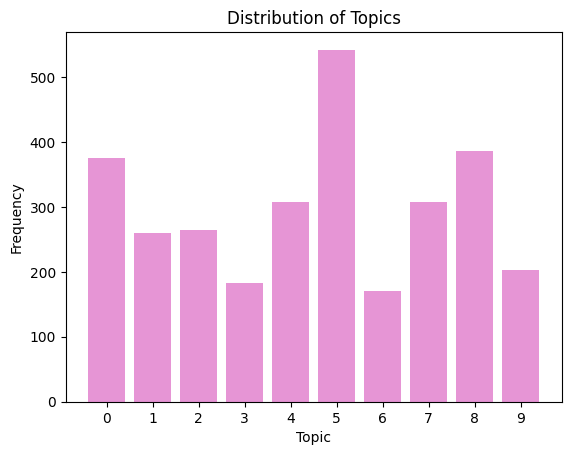

In [ ]:
# Plot histogram
plt.hist(topic_assignments, bins=range(num_topics + 1), color = '#e695d5', align='left', rwidth=0.8)
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Distribution of Topics')
plt.xticks(range(num_topics))
plt.show()

In [ ]:
# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
num_top_words = 5  # Number of top words to display for each topic

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: owner, homeless, property, man, shelter
Topic 2: water, worker, city, family, afford
Topic 3: officer, country, border, family, bus
Topic 4: city, government, water, area, man
Topic 5: neighbor, single, neighbour, afford, f1
Topic 6: store, manager, police, catches, owner
Topic 7: company, employer, food, family, money
Topic 8: afford, medication, police, pharmacist, report
Topic 9: student, school, afford, family, report
Topic 10: hospital, school, librarian, owner, library


In [ ]:
df['Assigned_Topic'] = topic_assignments

In [ ]:
df.head()

,Text,Topic,Lower-end label,Upper-end label,Assigned_Topic
0,Person P1 struggles to make ends meet with a s...,T5_Theft,Other,P1,8
1,"Person P1, a single mother of two with an annu...",T5_Theft,Other,P1,5
2,"Person P1, a homeless man, takes shelter in a ...",T0_Homelessness,Other,P1,5
3,"Person P1, working for minimum wage, steals fo...",T3_Hunger,P1,P1,6
4,"Person P1, a refugee with no income, is detain...",T5_Theft,P1,P1,5


In [ ]:
df.to_csv('/content/drive/MyDrive/SK/SilverSpoon_Assigned_Topics.csv', index=False)